[Reference]
https://github.com/gustavovelascoh/octane-NIR
* octane.xlsx - octane NIR dataset provided by CAMO Software.
* gasoline.csv - gasoline NIR dataset exported from pls R package

In [20]:
import numpy as np
import pandas as pd

def import_dataset(ds_name='octane'):
    """
    ds_name: Name of the dataset ('octane', 'gasoline')
    Returns:
    wls: Numpy ndarray: List of wavelength
    xdata: Pandas DataFrame: Measurements
    ydata: Pandas Series: Octane numbers
    """

    if ds_name == 'octane':
        oct_df = pd.read_excel('octane.xlsx')
        wls = np.array([int(i) for i in oct_df.columns.values[2:]])
        xdata = oct_df.loc[:, '1100':]
        ydata = oct_df['Octane number']
    elif ds_name == 'gasoline':
        import re

        gas_df = pd.read_csv('gasoline.csv')
        reg = re.compile('([0-9]+)')
        wls = np.array([int(reg.findall(i)[0]) for i in gas_df.columns.values[1:]])
        xdata = gas_df.loc[:, 'NIR.900 nm':]
        ydata = gas_df['octane']
    else:
        exit('Invalid Dataset')

    return wls, xdata, ydata

In [21]:
#dataset = 'gasoline'
dataset = 'octane'
wls, xdata, ydata = import_dataset(dataset)

In [22]:
print(len(wls))
wls

226


array([1100, 1102, 1104, 1106, 1108, 1110, 1112, 1114, 1116, 1118, 1120,
       1122, 1124, 1126, 1128, 1130, 1132, 1134, 1136, 1138, 1140, 1142,
       1144, 1146, 1148, 1150, 1152, 1154, 1156, 1158, 1160, 1162, 1164,
       1166, 1168, 1170, 1172, 1174, 1176, 1178, 1180, 1182, 1184, 1186,
       1188, 1190, 1192, 1194, 1196, 1198, 1200, 1202, 1204, 1206, 1208,
       1210, 1212, 1214, 1216, 1218, 1220, 1222, 1224, 1226, 1228, 1230,
       1232, 1234, 1236, 1238, 1240, 1242, 1244, 1246, 1248, 1250, 1252,
       1254, 1256, 1258, 1260, 1262, 1264, 1266, 1268, 1270, 1272, 1274,
       1276, 1278, 1280, 1282, 1284, 1286, 1288, 1290, 1292, 1294, 1296,
       1298, 1300, 1302, 1304, 1306, 1308, 1310, 1312, 1314, 1316, 1318,
       1320, 1322, 1324, 1326, 1328, 1330, 1332, 1334, 1336, 1338, 1340,
       1342, 1344, 1346, 1348, 1350, 1352, 1354, 1356, 1358, 1360, 1362,
       1364, 1366, 1368, 1370, 1372, 1374, 1376, 1378, 1380, 1382, 1384,
       1386, 1388, 1390, 1392, 1394, 1396, 1398, 14

In [23]:
import dataframe_image as dfi

print(xdata.shape)
dfi.export(xdata, 'octane_table_001.png', max_cols=10, max_rows=10,)
xdata

(39, 226)


,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,1532,1534,1536,1538,1540,1542,1544,1546,1548,1550
0,-0.001835,-0.001496,-0.001009,-0.000360,0.000466,0.001502,0.002798,0.004410,0.006397,0.008884,...,0.040192,0.038423,0.036768,0.035235,0.033835,0.032575,0.031462,0.030508,0.029727,0.029127
1,-0.001627,-0.001261,-0.000748,-0.000065,0.000818,0.001943,0.003354,0.005088,0.007170,0.009686,...,0.041009,0.039185,0.037459,0.035842,0.034354,0.033023,0.031876,0.030927,0.030179,0.029622
2,-0.000465,-0.000330,0.000181,0.001121,0.002465,0.004140,0.006075,0.008238,0.010632,0.013356,...,0.044729,0.043308,0.041914,0.040548,0.039222,0.037938,0.036706,0.035545,0.034493,0.033604
3,-0.001443,-0.001094,-0.000596,0.000082,0.000972,0.002114,0.003545,0.005299,0.007395,0.009922,...,0.045022,0.043128,0.041327,0.039629,0.038052,0.036621,0.035361,0.034299,0.033446,0.032808
4,-0.001607,-0.001155,-0.000548,0.000244,0.001259,0.002551,0.004177,0.006188,0.008622,0.011594,...,0.038111,0.036470,0.034925,0.033475,0.032138,0.030943,0.029920,0.029091,0.028468,0.028044
5,-0.000502,-0.000005,0.000657,0.001522,0.002631,0.004037,0.005791,0.007945,0.010536,0.013691,...,0.038203,0.036589,0.035068,0.033646,0.032348,0.031200,0.030228,0.029451,0.028868,0.028470
6,-0.001131,-0.000801,-0.000323,0.000320,0.001149,0.002204,0.003541,0.005225,0.007321,0.009973,...,0.041421,0.039772,0.038186,0.036665,0.035224,0.033886,0.032675,0.031614,0.030723,0.030015
7,-0.001969,-0.001627,-0.001136,-0.000469,0.000399,0.001502,0.002875,0.004548,0.006539,0.008936,...,0.041805,0.039959,0.038188,0.036502,0.034923,0.033479,0.032204,0.031114,0.030224,0.029534
8,-0.001294,-0.000952,-0.000473,0.000178,0.001039,0.002151,0.003551,0.005264,0.007296,0.009715,...,0.043293,0.041393,0.039580,0.037867,0.036279,0.034846,0.033601,0.032565,0.031748,0.031143
9,-0.000984,-0.000542,0.000047,0.000822,0.001823,0.003100,0.004702,0.006669,0.009020,0.011853,...,0.037824,0.036120,0.034537,0.033082,0.031774,0.030637,0.029694,0.028955,0.028421,0.028081


In [24]:
print(ydata.shape)
ydata.head()

(39,)


0    88.600006
1    88.800003
2    89.400002
3    86.700005
4    91.199997
Name: Octane number, dtype: float64

# Plot dataset (raw)

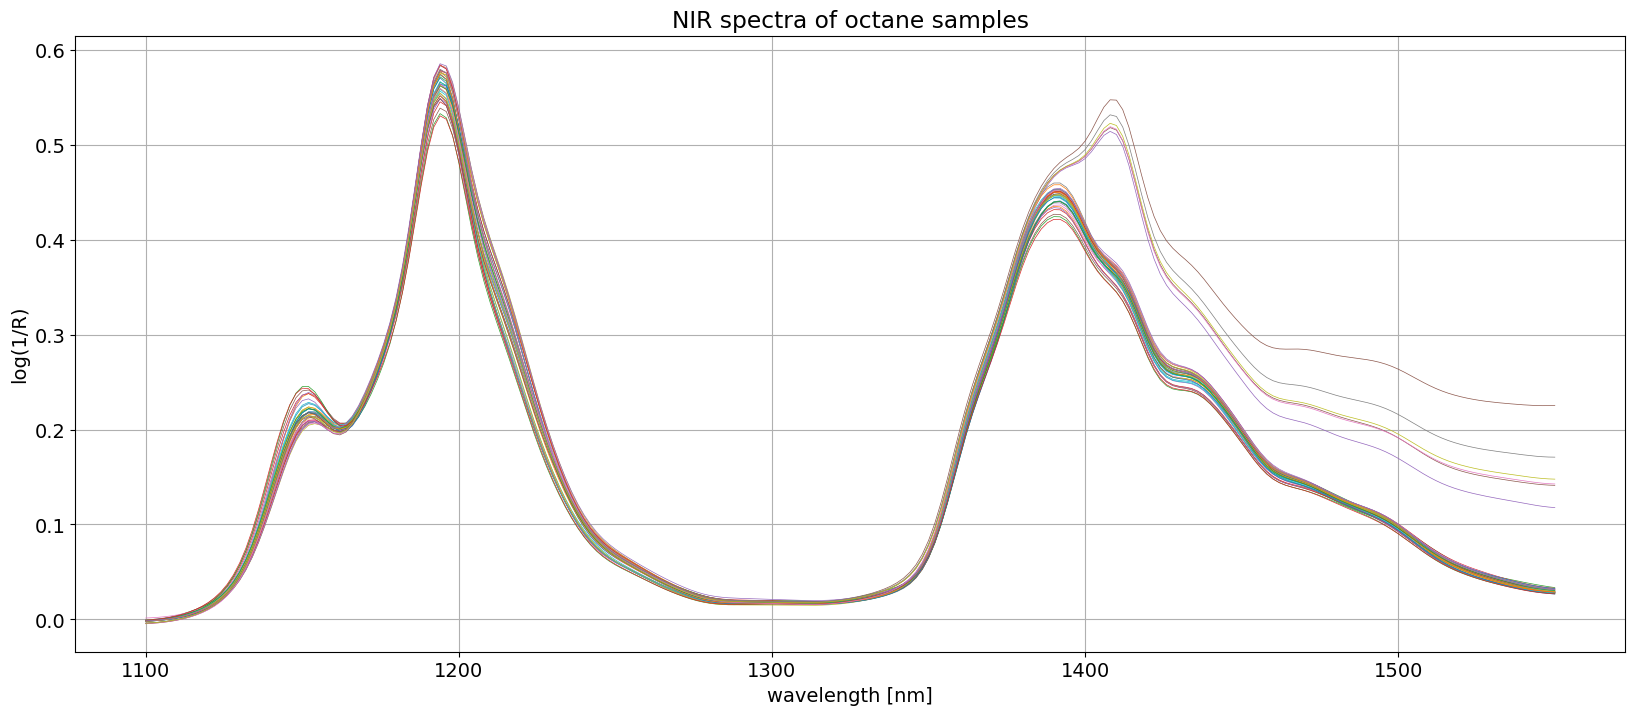

In [25]:
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14

fig, ax = plt.subplots(figsize=(20, 8))
ax.plot(wls, xdata.values.T, linewidth=0.5)
ax.set_title('NIR spectra of %s samples' % dataset)
ax.set_xlabel('wavelength [nm]')
ax.set_ylabel('log(1/R)')

plt.grid()
plt.savefig('octane_001.png')
plt.show()

In [26]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(xdata, ydata, test_size=0.16, shuffle=False)

In [27]:
X_test

,1100,1102,1104,1106,1108,1110,1112,1114,1116,1118,...,1532,1534,1536,1538,1540,1542,1544,1546,1548,1550
32,-0.001011,-0.000590,-0.000011,0.000760,0.001760,0.003038,0.004640,0.006605,0.008951,0.011773,...,0.042062,0.040285,0.038595,0.036999,0.035517,0.034177,0.033002,0.032011,0.031218,0.030632
33,-0.000883,-0.000384,0.000284,0.001165,0.002312,0.003777,0.005617,0.007880,0.010601,0.013901,...,0.036837,0.035206,0.033669,0.032232,0.030914,0.029749,0.028758,0.027957,0.027346,0.026917
34,-0.001461,-0.001068,-0.000533,0.000178,0.001102,0.002284,0.003754,0.005534,0.007624,0.010088,...,0.043325,0.041422,0.039618,0.037924,0.036369,0.034982,0.033785,0.032785,0.031981,0.031363
35,-0.003937,-0.003527,-0.002971,-0.002237,-0.001288,-0.000079,0.001438,0.003308,0.005554,0.008286,...,0.148128,0.147099,0.146097,0.145120,0.144182,0.143311,0.142546,0.141921,0.141473,0.141234
36,-0.004330,-0.003950,-0.003428,-0.002735,-0.001833,-0.000683,0.000754,0.002512,0.004611,0.007150,...,0.150038,0.149020,0.148023,0.147029,0.146042,0.145094,0.144236,0.143512,0.142969,0.142647
37,-0.003821,-0.003414,-0.002857,-0.002124,-0.001184,0.000005,0.001488,0.003312,0.005508,0.008184,...,0.176755,0.175866,0.174999,0.174144,0.173312,0.172539,0.171869,0.171346,0.171011,0.170895
38,-0.003917,-0.003515,-0.002957,-0.002218,-0.001268,-0.000069,0.001428,0.003267,0.005480,0.008177,...,0.154593,0.153612,0.152655,0.151709,0.150779,0.149897,0.149110,0.148463,0.147996,0.147741


# Partial Least Squares Regression

Now it’s time to get to the optimisation of the PLS regression. As anticipated above, we want to run a PLS regression with a variable number of components and test its performance in cross-validation. In practice we want to find the number of components that minimises the MSE. Let’s write a function for it.

Reference:
https://nirpyresearch.com/partial-least-squares-regression-python/

In [28]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import mean_squared_error

list_mse = []
n_comp = int(xdata.shape[1] / 10)
component = np.arange(1, n_comp + 1)
    
for i in component:
    pls = PLSRegression(n_components=i)

    # Cross-validation
    y_cv = cross_val_predict(pls, X_train, y_train, cv=10)
    # Root Mean Square Error of Precision
    mse = mean_squared_error(y_train, y_cv, squared=True)
    list_mse.append(mse)

# Calculate and print the position of minimum in RMSE
mse_min = np.argmin(list_mse)
print('Suggested number of components: ', mse_min + 1)

Suggested number of components:  10


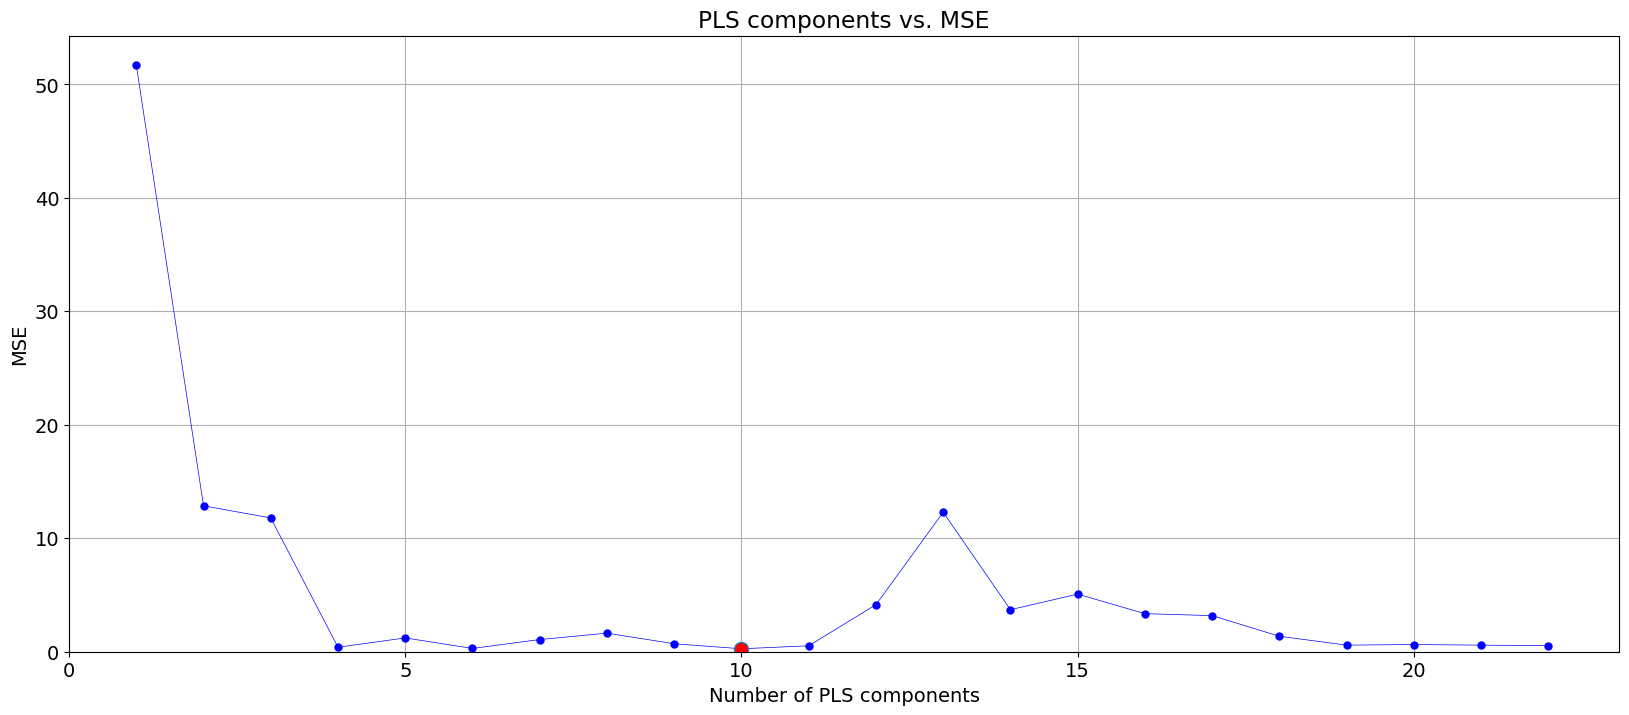

In [29]:
fig, ax = plt.subplots(figsize=(20, 8))

plt.plot(component, np.array(list_mse), '-o', ms=5, color = 'blue', mfc='blue', linewidth=0.5)
plt.plot(component[mse_min], np.array(list_mse)[mse_min], 'o', ms=10, mfc='red')
plt.xlabel('Number of PLS components')
plt.ylabel('MSE')
plt.title('PLS components vs. MSE')
plt.xlim(left=0)
plt.ylim(bottom=0)
#ax.xaxis.set_ticks(np.arange(0, n_comp, 1))
plt.grid()

plt.savefig('octane_002.png')
plt.show()

## Training data

In [30]:
from sklearn.metrics import r2_score

# Define PLS object with optimal number of components
pls_opt = PLSRegression(n_components=mse_min + 1)

# Fit to the entire dataset
pls_opt.fit(X_train, y_train)
y_train_c = pls_opt.predict(X_train)

# Cross-validation
y_train_cv = cross_val_predict(pls_opt, X_train, y_train, cv=10)

# Calculate scores for calibration and cross-validation
score_train_c = r2_score(y_train, y_train_c)
score_train_cv = r2_score(y_train, y_train_cv)

# Calculate mean squared error for calibration and cross validation
mse_train_c = mean_squared_error(y_train, y_train_c)
mse_train_cv = mean_squared_error(y_train, y_train_cv)

print('for Training data')
print('R2 calib: %5.3f'  % score_train_c)
print('R2 CV: %5.3f'  % score_train_cv)
print('MSE calib: %5.3f' % mse_train_c)
print('MSE CV: %5.3f' % mse_train_cv)

for Training data
R2 calib: 0.997
R2 CV: 0.935
MSE calib: 0.014
MSE CV: 0.259


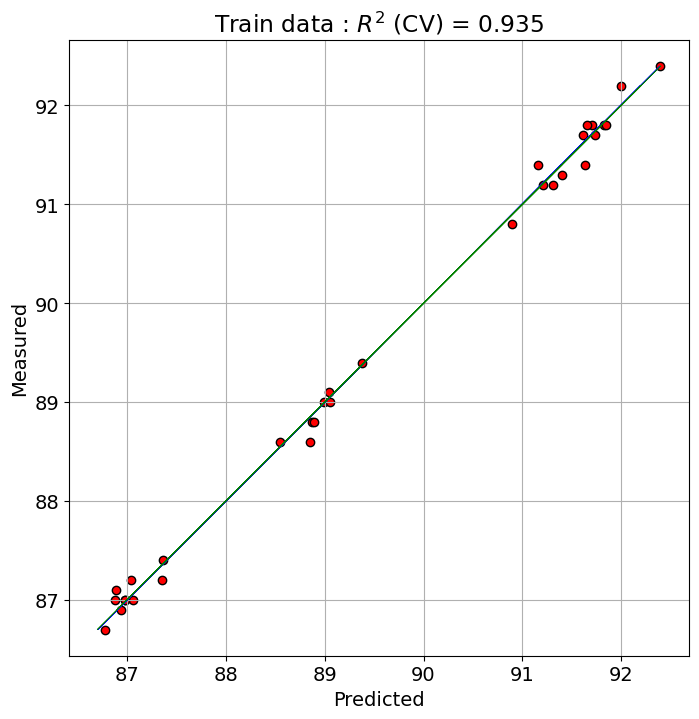

In [31]:
# Plot regression and figures of merit
rangey = max(y_train) - min(y_train)
rangex = max(y_train_c) - min(y_train_c)

# Fit a line to the CV vs response
z = np.polyfit(y_train, y_train_c, 1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_train_c, y_train, c='red', edgecolors='k')

# Plot the best fit line
ax.plot(np.polyval(z, y_train), y_train, c='blue', linewidth=0.5)

# Plot the ideal 1:1 line
ax.plot(y_train, y_train, color='green', linewidth=0.5)

plt.title('Train data : $R^{2}$ (CV) = ' + '{:.3f}'.format(score_train_cv))
plt.xlabel('Predicted')
plt.ylabel('Measured')
ax.axis('equal')
plt.grid()

plt.savefig('octane_003.png')
plt.show()

## Test data

In [32]:
# Fit to the entire dataset
pls_opt.fit(X_test, y_test)
y_pred = pls_opt.predict(X_test)
  
# Calculate scores for calibration and cross-validation
score_pred = r2_score(y_test, y_pred)
 
# Calculate mean squared error for calibration and cross validation
mse_pred = mean_squared_error(y_test, y_pred)
 
print('for Test data')
print('R2 pred: %5.3f' % score_pred)
print('MSE pred: %5.3f' % mse_pred)

for Test data
R2 pred: 1.000
MSE pred: 0.000


/home/bitwalk/PycharmProjects/MyNotebook/venv/lib64/python3.10/site-packages/sklearn/cross_decomposition/_pls.py:300: UserWarning: Y residual is constant at iteration 7
  warnings.warn(f"Y residual is constant at iteration {k}")


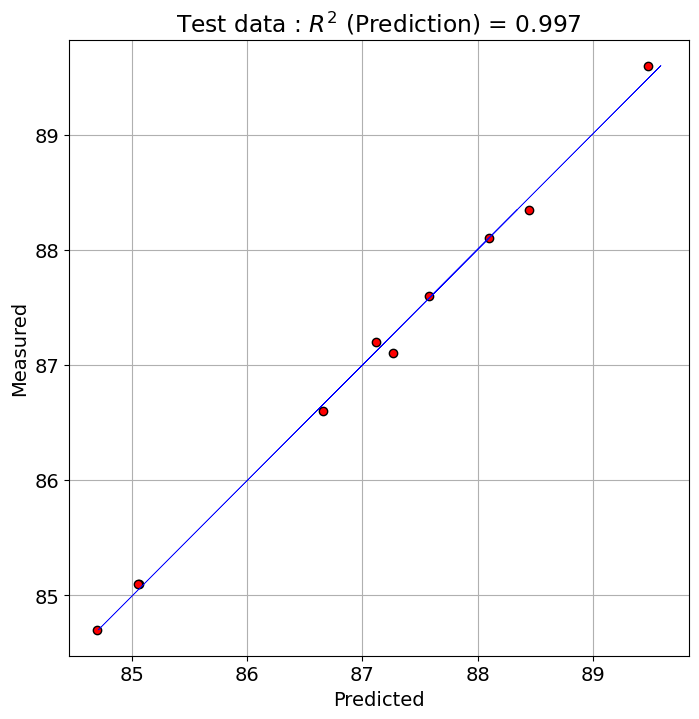

In [16]:
# Plot regression and figures of merit
rangey = max(y_test) - min(y_test)
rangex = max(y_pred) - min(y_pred)

# Fit a line to the CV vs response
z = np.polyfit(y_test, y_pred, 1)
fig, ax = plt.subplots(figsize=(8, 8))
ax.scatter(y_pred, y_test, c='red', edgecolors='k')

# Plot the best fit line
ax.plot(np.polyval(z, y_test), y_test, c='blue', linewidth=0.5)

plt.title('Test data : $R^{2}$ (Prediction) = ' + '{:.3f}'.format(score_pred))
plt.xlabel('Predicted')
plt.ylabel('Measured')
ax.axis('equal')
plt.grid()

plt.savefig('octane_004.png')
plt.show()